In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:

plate_length = 50
# maschenweite
h = 1

# Heat equation: kappa * laplace T = T_t
# im stationären fall ist T_t = 0, also auch kappa * laplace T = 0
# also k * (T_xx + T_yy) = 0
# T_xx + T_yy ist die Summe der zweiten Ableitungen nach x und y
# kann man durch nen 5-punkt stencil berechnen
# wegen dirichlet-randbedingung (zu jedem zeitpunkt an einem ort eine konstante temperatur)
# sind manche u's im 5-punkt stencil zahlen und keine variablen, d.h. auf die rechte seite schaffen
top_temp = 100
bottom_temp = 40
left_temp = 60
right_temp = 0

init_dist = np.zeros((plate_length, plate_length))
init_dist[0, :] = bottom_temp
init_dist[plate_length-1, :] = top_temp
init_dist[1:plate_length-1, 0] = left_temp
init_dist[1:plate_length-1, plate_length-1] = right_temp

# die free map gibt an, an welchen stellen freie Variablen sind und an welchen nicht
# 1 = freie variable, 0 = durch dirichlet festgelegt
free_map = np.zeros((plate_length, plate_length))
free_map[1:plate_length-1, 1:plate_length-1] = 1

In [16]:
def plot_heatmap(u, title="Heat map"):
    
    plt.title(title)
    plt.pcolormesh(u, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()
    plt.show()
    
def plot_freemap(f):
    
    plt.title("Free variables (white)")
    plt.pcolormesh(f, cmap=plt.cm.gray)
    plt.show()

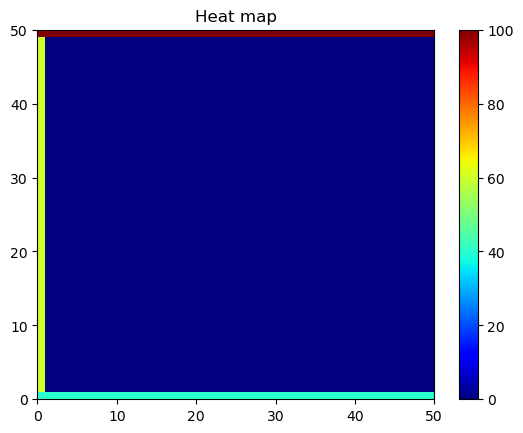

In [17]:
plot_heatmap(init_dist)

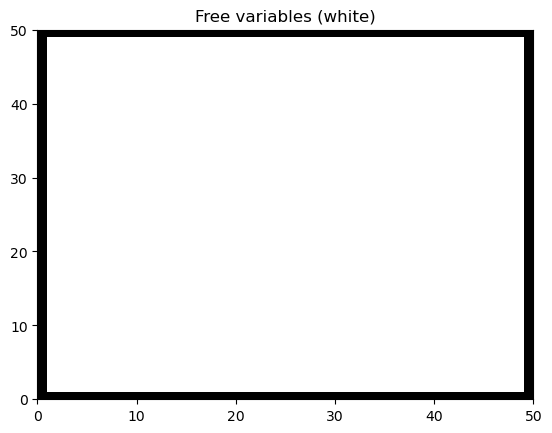

In [19]:
plot_freemap(free_map)

In [20]:
def generate_linear_system(init_dist, free_map):
    
    A = []
    B = []
    
    height = len(init_dist)
    width = len(init_dist[0])
    
    delete_cols = []
    
    # fuer jede freie variable muss eine gleichung erstellt werden
    for i in range(0, height):
        for j in range(0, width):
            
            #variable nicht frei, nichts generieren
            if free_map[i, j] == 0:
                delete_cols.append(width * i + j)
                continue
                
            
            # für jede freie variable eine gleichung ax = b generieren
            a = np.zeros(width * height)
            b = 0
            
            a[i * width + j] = -4
            
            # loope über vier nachbarn
            for (d_i, d_j) in [(0, 1), (1,0), (-1, 0), (0, -1)]:
                
                n_i = i + d_i
                n_j = j + d_j
                
                if free_map[n_i, n_j] == 0:
                    b -= init_dist[n_i, n_j]
                    
                else:
                    a[n_i * width + n_j] = 1
                    
            A.append(a)
            B.append(b)
    
    # die einzelnen gleichungen sind noch zu lang, d.h. zu viele freie variablen
    # und noch nicht quadratisch
    # loesche spalten raus
    A = np.array(A)
    b = np.array(B).reshape(-1, 1)
    
    A = np.delete(A, delete_cols, axis=1)
    
    return A, b

In [21]:
A, b = generate_linear_system(init_dist, free_map)

# die Matrix A ist quadratisch (notwendig fuer invertierbarkeit)
assert(len(A) == len(A[0]))

# A und b bilden ein lineares Gleichungssystem
assert(len(A) == len(b))

In [22]:
# hier wird die stationäre verteilung bestimmt (also wert aller freien variablen)
x = np.matmul(np.linalg.inv(A), b)

In [23]:
def get_stat_dist(init_dist, free_map):
    
    A, b = generate_linear_system(init_dist, free_map)
    x = np.matmul(np.linalg.inv(A), b)
    
    stat_dist = np.zeros(init_dist.shape)
    counter = 0

    for i in range(0, plate_length):
        for j in range(0, plate_length):

            if free_map[i, j] == 1:
                stat_dist[i, j] = x[counter]
                counter += 1
                
            else:
                stat_dist[i, j] = init_dist[i, j]
                
    return stat_dist

In [24]:
stat_dist = get_stat_dist(init_dist, free_map)

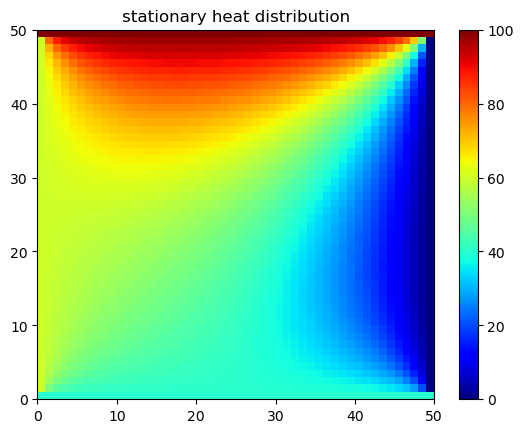

In [25]:
plot_heatmap(stat_dist, title="stationary heat distribution")

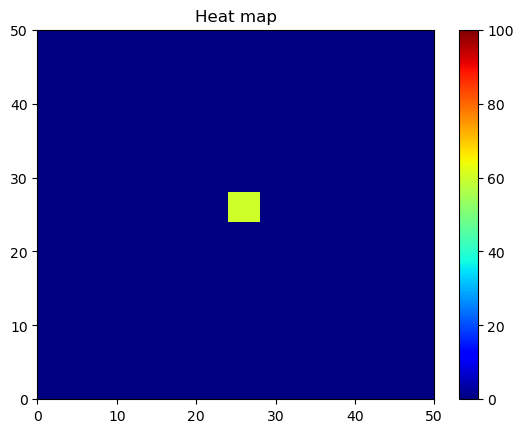

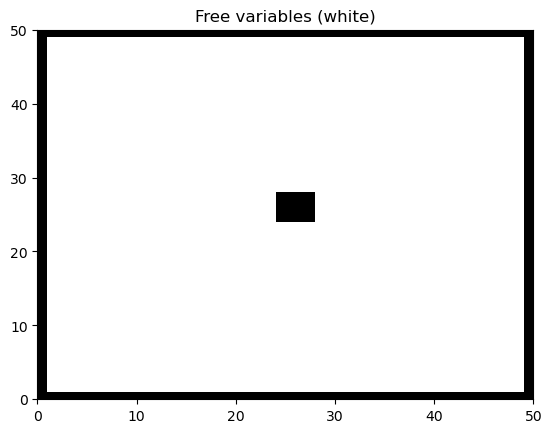

In [26]:
# fuege einen wärmeklotz in der mitte ein
init_dist_2 = np.zeros((plate_length, plate_length))
init_dist_2[0, :] = 0
init_dist_2[plate_length-1, :] = 0
init_dist_2[1:plate_length-1, 0] = 0
init_dist_2[1:plate_length-1, plate_length-1] = 0

free_map_2 = np.zeros((plate_length, plate_length))
free_map_2[1:plate_length-1, 1:plate_length-1] = 1

init_dist_2[24:28, 24:28] = 60
free_map_2[24:28, 24:28] = 0

plot_heatmap(init_dist_2)
plot_freemap(free_map_2)

In [27]:
stat_dist_box = get_stat_dist(init_dist_2, free_map_2)

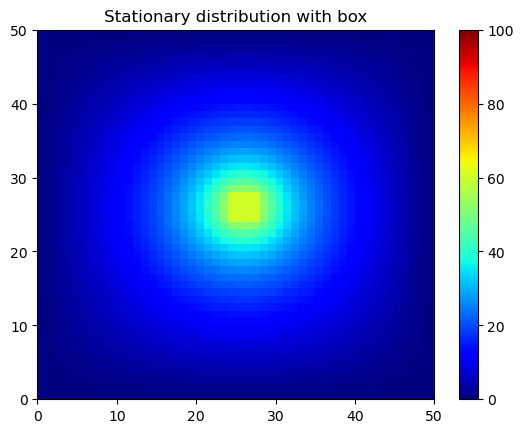

In [28]:
plot_heatmap(stat_dist_box, "Stationary distribution with box")